In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def compareProbabilityDensityOfAgesInCategory(full,subcat):
    fig,ax = plt.subplots()
    full['Age'].plot.kde(ax=ax,label="Full Data, Ages")
    full[full[subcat]==1.0]['Age'].plot.kde(ax=ax, label="{}, Ages".format(subcat))
    ax.set_ylabel('Probability')
    ax.legend()
    
    sub = full[full[subcat]==1.0]
    diff_mean = full['Age'].mean() - sub['Age'].mean()
    print("difference in age means: {}".format(diff_mean))
    diff_var = full['Age'].var() - sub['Age'].var()
    print("difference in age variances: {}".format(diff_var))

In [3]:
df = pd.read_csv('./data/train_plus_PIDs.csv') # training data from CheXpert-v1.0-small
df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,PID
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN,2
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,3


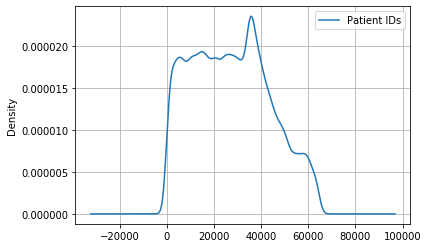

In [4]:
# look at distribution of patient IDs
fig,ax = plt.subplots()
df['PID'].plot.kde(ax=ax,label="Patient IDs")
ax.grid('y')
ax.legend()

The above figure shows the frequency of imaging studies associated with a given patient in the training dataset. 

max number of studies for a patient: 92
min number of studies for a patient: 1
avg number of studies for a patient: 3.461636194607995
variance of number of studies for a patient: 21.712855966412242


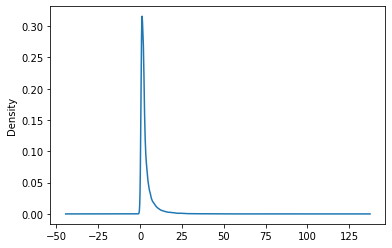

In [24]:
pvt = pd.pivot_table(df, index='PID', aggfunc='size')
print('max number of studies for a patient: {}'.format(pvt.max()))
print('min number of studies for a patient: {}'.format(pvt.min()))
print('avg number of studies for a patient: {}'.format(pvt.mean()))
print('variance of number of studies for a patient: {}'.format(pvt.var()))
pvt.plot.kde()

Looks like an exponential distribution (which is fair). There are a whole lot of patients who have had very few imaging studies and very few patients who have had many imaging studies.

difference in age means: 9.502321338406198
difference in age variances: 4.232494189332101


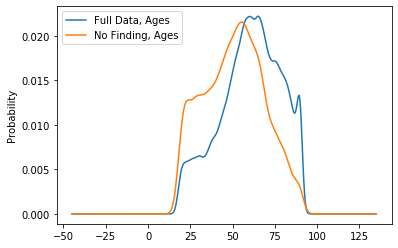

In [6]:
# investigate subset where there was no finding
compareProbabilityDensityOfAgesInCategory(df,'No Finding')

It is interesting that there is a pretty large shift in age distribution for imaging studies for which there were no findings compared to all the imaging studies conducted. Let's investigate further...

max number of studies for a patient: 21
min number of studies for a patient: 1
avg number of studies for a patient: 1.5981862325049985
variance of number of studies for a patient: 0.9280864050780739


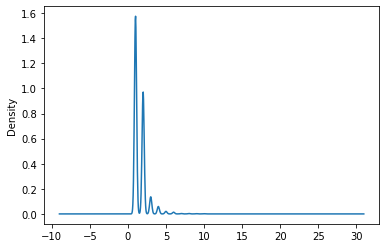

In [25]:
no_findings = df[df['No Finding']==1.0]
pvt = pd.pivot_table(no_findings, index='PID', aggfunc='size')
print('max number of studies for a patient: {}'.format(pvt.max()))
print('min number of studies for a patient: {}'.format(pvt.min()))
print('avg number of studies for a patient: {}'.format(pvt.mean()))
print('variance of number of studies for a patient: {}'.format(pvt.var()))
pvt.plot.kde()

Interestingly, there are multiple peaks for how many imaging studies an individual patient has had that contain No Findings. Perhaps this has to do with how many studies are performed in an individual encounter, which could all have the same result. But it is odd that there was a patient who had 21 studies performed that all had a result

In [26]:
pvt[pvt==pvt.max()]

PID
22987    21
dtype: int64

In [36]:
patient_with_most_noFindings = df[df['PID']==pvt[pvt==pvt.max()].index[0]]
patient_with_most_noFindings.to_csv('./data/patient{}.csv'.format(pvt[pvt==pvt.max()].index[0]), index=False)

In [37]:
# investigate subset where there was pneumothorax
#compareProbabilityDensityOfAgesInCategory(df,'Pneumothorax')

KeyError: 'No Findings'

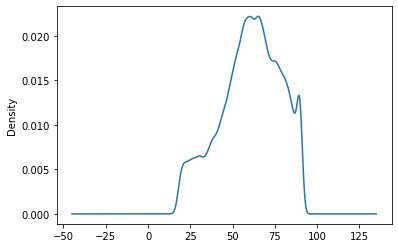

In [39]:
fig,ax = plt.subplots()
df['Age'].plot.kde(ax=ax,label="Full Data, Ages")
df[df['No Findings']!=1.0]['Age'].plot.kde(ax=ax, label="Some Finding Ages")
ax.set_ylabel('Probability')
ax.legend()

sub = df[df['No Findings']!=1.0]
diff_mean = df['Age'].mean() - sub['Age'].mean()
print("difference in age means: {}".format(diff_mean))
diff_var = df['Age'].var() - sub['Age'].var()
print("difference in age variances: {}".format(diff_var))